# Lake model continued - subspace partitioning

In the previous week you used the lake problem as a means of getting acquainted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of the [open exploration tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## 1. Apply scenario discovery

1. Instanciate the model and define its parameters. Use the same parameters as in Assignment 2.
2. Generate 10 policies and 1000 scenarios and evaluate them.
3. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop_columns`*
4. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability

In [96]:
from lakemodel_function import lake_problem
from ema_workbench import Model, RealParameter, ScalarOutcome

In [97]:
# Instantiate the model
model = Model('lake', function = lake_problem)

# Specify uncertainties
model.uncertainties = [
    RealParameter('mean', 0.01, 0.05),
    RealParameter('stdev', 0.001, 0.005),
    RealParameter('b', 0.1, 0.45),
    RealParameter('q', 2, 4.5),
    RealParameter('delta', 0.93, 0.99)
]

# Set levers, one for each time step
model.levers = [
    RealParameter(f'l{i}', 0, 0.1) for i in range(100) 
] # l0 - l99

# Specify outcomes
model.outcomes = [
    ScalarOutcome('max_P'),
    ScalarOutcome('utility'),
    ScalarOutcome('inertia'),
    ScalarOutcome('reliability'),
]

In [98]:
from ema_workbench import SequentialEvaluator, MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
100%|██████████████████████████████████| 10000/10000 [00:08<00:00, 1182.14it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [99]:
experiments

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.309510,0.969611,0.035938,3.632830,0.001550,0.025707,0.002121,0.093070,0.072878,0.026212,...,0.056055,0.096999,0.084338,0.032020,0.032966,0.054519,0.045022,1020,1010,lake
1,0.425557,0.968704,0.041872,3.406653,0.002898,0.025707,0.002121,0.093070,0.072878,0.026212,...,0.056055,0.096999,0.084338,0.032020,0.032966,0.054519,0.045022,1021,1010,lake
2,0.242398,0.957977,0.016086,3.252328,0.003000,0.025707,0.002121,0.093070,0.072878,0.026212,...,0.056055,0.096999,0.084338,0.032020,0.032966,0.054519,0.045022,1022,1010,lake
3,0.197162,0.953450,0.043012,3.444516,0.002724,0.025707,0.002121,0.093070,0.072878,0.026212,...,0.056055,0.096999,0.084338,0.032020,0.032966,0.054519,0.045022,1023,1010,lake
4,0.182327,0.939891,0.010891,3.920137,0.004670,0.025707,0.002121,0.093070,0.072878,0.026212,...,0.056055,0.096999,0.084338,0.032020,0.032966,0.054519,0.045022,1024,1010,lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.203226,0.945877,0.040079,3.799859,0.002408,0.079732,0.085514,0.088133,0.043912,0.066047,...,0.000137,0.073545,0.058585,0.043206,0.074354,0.036709,0.062501,2015,1019,lake
9996,0.301984,0.943245,0.030439,2.453895,0.003719,0.079732,0.085514,0.088133,0.043912,0.066047,...,0.000137,0.073545,0.058585,0.043206,0.074354,0.036709,0.062501,2016,1019,lake
9997,0.316186,0.980657,0.021024,4.448574,0.004304,0.079732,0.085514,0.088133,0.043912,0.066047,...,0.000137,0.073545,0.058585,0.043206,0.074354,0.036709,0.062501,2017,1019,lake
9998,0.315803,0.933203,0.023024,3.744771,0.002559,0.079732,0.085514,0.088133,0.043912,0.066047,...,0.000137,0.073545,0.058585,0.043206,0.074354,0.036709,0.062501,2018,1019,lake


In [100]:
levers = [f'l{i}' for i in range(100)] # l0 - l99

experiments = experiments.drop(columns=levers)

In [101]:
experiments.head()

,b,delta,mean,q,stdev,scenario,policy,model
0,0.309510,0.969611,0.035938,3.632830,0.001550,1020,1010,lake
1,0.425557,0.968704,0.041872,3.406653,0.002898,1021,1010,lake
2,0.242398,0.957977,0.016086,3.252328,0.003000,1022,1010,lake
3,0.197162,0.953450,0.043012,3.444516,0.002724,1023,1010,lake
4,0.182327,0.939891,0.010891,3.920137,0.004670,1024,1010,lake


In [102]:
outcomes

{'max_P': array([3.54411119, 0.33010662, 4.47205195, ..., 0.30754073, 0.33109017,
        5.25267524]),
 'utility': array([0.61772793, 0.60114526, 0.4508481 , ..., 0.88224523, 0.31055569,
        0.50718951]),
 'inertia': array([0.5959596 , 0.5959596 , 0.5959596 , ..., 0.61616162, 0.61616162,
        0.61616162]),
 'reliability': array([0.6447, 1.    , 0.2761, ..., 1.    , 1.    , 0.07  ])}

In [103]:
for k, v in outcomes.items():
    print(k, v.shape)

max_P (10000,)
utility (10000,)
inertia (10000,)
reliability (10000,)


In [104]:
import pandas as pd

summary = {k: v for k, v in outcomes.items()}
df = pd.DataFrame(summary)
df.describe()

,max_P,utility,inertia,reliability
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.850908,0.575569,0.596970,0.412087
std,2.943404,0.265178,0.036826,0.409070
min,0.196706,0.254476,0.525253,0.020000
25%,0.408531,0.361426,0.575758,0.080000
50%,3.792352,0.490552,0.606061,0.165350
75%,5.806143,0.735529,0.626263,1.000000
max,10.995672,1.402145,0.636364,1.000000


## Scenario discovery
focussing on the 10 percent of worst outcomes for reliability

In [105]:
# specify y

import numpy as np
threshold = np.percentile(outcomes['reliability'], 10)

y = outcomes['reliability'] < threshold

In [106]:
y

array([False, False, False, ..., False, False, False])

In [107]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   b         10000 non-null  float64 
 1   delta     10000 non-null  float64 
 2   mean      10000 non-null  float64 
 3   q         10000 non-null  float64 
 4   stdev     10000 non-null  float64 
 5   scenario  10000 non-null  category
 6   policy    10000 non-null  category
 7   model     10000 non-null  category
dtypes: category(3), float64(5)
memory usage: 470.4 KB


In [108]:
# PRIM
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO);

prim_alg = prim.Prim(x=experiments, y=y, threshold=0.8, peel_alpha=0.1)

box1 = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category


[MainProcess/INFO] 10000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] mean: 0.889090909090909, mass: 0.055, coverage: 0.489, density: 0.889090909090909 restricted_dimensions: 4


In [109]:
box1.box_lims

[          b     delta      mean         q     stdev  \
 0  0.100160  0.930019  0.010031  2.002361  0.001004   
 1  0.449811  0.989989  0.049970  4.499246  0.004998   
 
                                               policy  
 0  {1010, 1011, 1012, 1013, 1014, 1015, 1016, 101...  
 1  {1010, 1011, 1012, 1013, 1014, 1015, 1016, 101...  ,
           b     delta      mean         q     stdev  \
 0  0.100160  0.930019  0.010031  2.002361  0.001004   
 1  0.414889  0.989989  0.049970  4.499246  0.004998   
 
                                               policy  
 0  {1010, 1011, 1012, 1013, 1014, 1015, 1016, 101...  
 1  {1010, 1011, 1012, 1013, 1014, 1015, 1016, 101...  ,
           b     delta      mean         q     stdev  \
 0  0.100160  0.930019  0.010031  2.002361  0.001004   
 1  0.383356  0.989989  0.049970  4.499246  0.004998   
 
                                               policy  
 0  {1010, 1011, 1012, 1013, 1014, 1015, 1016, 101...  
 1  {1010, 1011, 1012, 1013, 1014, 1015,

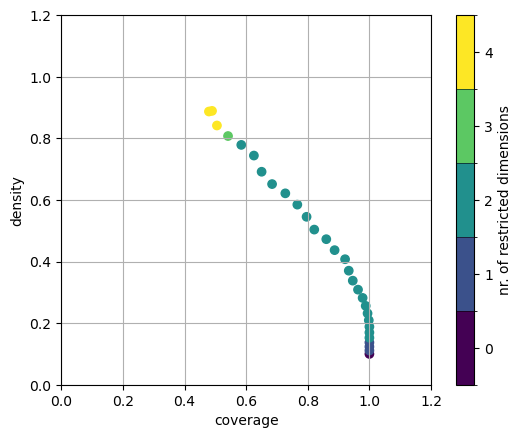

In [110]:
import matplotlib.pyplot as plt

box1.show_tradeoff()
plt.grid(True)
plt.show()

In [111]:
box1.inspect(25)

coverage      0.541000
density       0.807463
id           25.000000
k           541.000000
mass          0.067000
mean          0.807463
n           670.000000
res_dim       3.000000
Name: 25, dtype: float64

         box 25                                  
            min       max qp value       qp value
q      2.002361  2.548454      NaN  3.979848e-217
b      0.100160  0.229425      NaN  2.291045e-126
delta  0.930019  0.982269      NaN   3.852073e-02



[None]

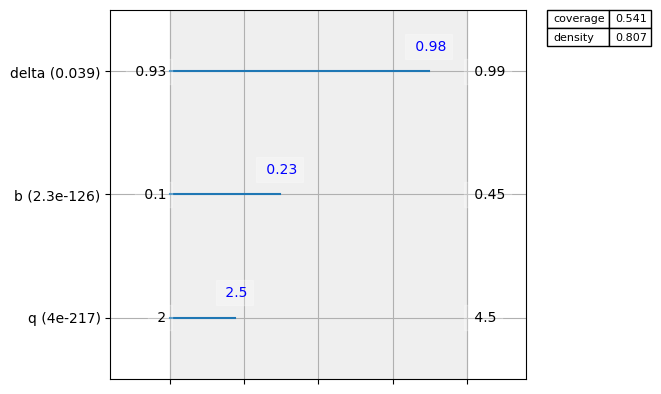

In [112]:
box1.inspect(25, style='graph')
plt.grid(True)
plt.show()

In [113]:
data = data = pd.DataFrame(y)

[MainProcess/INFO] no time dimension found in results


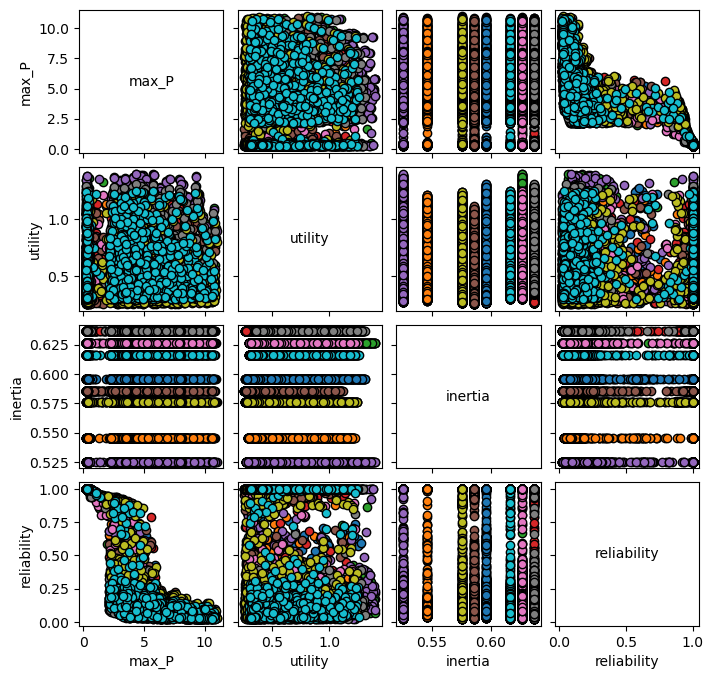

In [114]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by="policy", legend=False)
fig.set_size_inches(8, 8)
plt.show()

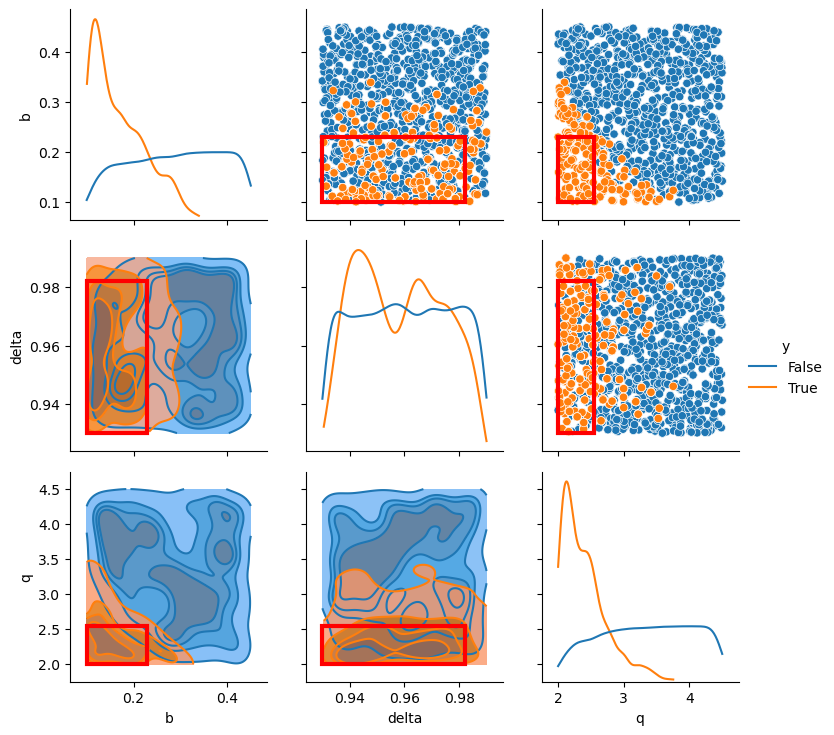

In [115]:
box1.show_pairs_scatter(25)
plt.show()

In [117]:
outcomes

{'max_P': array([3.54411119, 0.33010662, 4.47205195, ..., 0.30754073, 0.33109017,
        5.25267524]),
 'utility': array([0.61772793, 0.60114526, 0.4508481 , ..., 0.88224523, 0.31055569,
        0.50718951]),
 'inertia': array([0.5959596 , 0.5959596 , 0.5959596 , ..., 0.61616162, 0.61616162,
        0.61616162]),
 'reliability': array([0.6447, 1.    , 0.2761, ..., 1.    , 1.    , 0.07  ])}

In [118]:
y

array([False, False, False, ..., False, False, False])

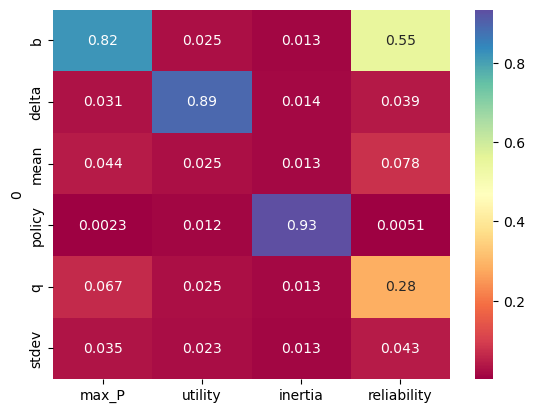

In [119]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

fs = feature_scoring.get_feature_scores_all(x=experiments, y=outcomes)
sns.heatmap(fs, cmap="Spectral", annot=True)
plt.show()

In [120]:
from ema_workbench.analysis import RuleInductionType

x = experiments
y = outcomes['reliability'] < threshold

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)

,1
0,
q,0.404828
b,0.339218
mean,0.094294
policy,0.065136
delta,0.048851
stdev,0.047674


q and b are the most influential features

## 2. Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

It involves two steps: identifying the most important uncertainties that affect system behavior, and creating a pivot table using the most influential uncertainties. In order to do this, we first need, as in scenario discovery, specify the outcomes that are of interest. The creating of the pivot table involves binning the uncertainties.

[MainProcess/INFO] model dropped from analysis because only a single category
/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


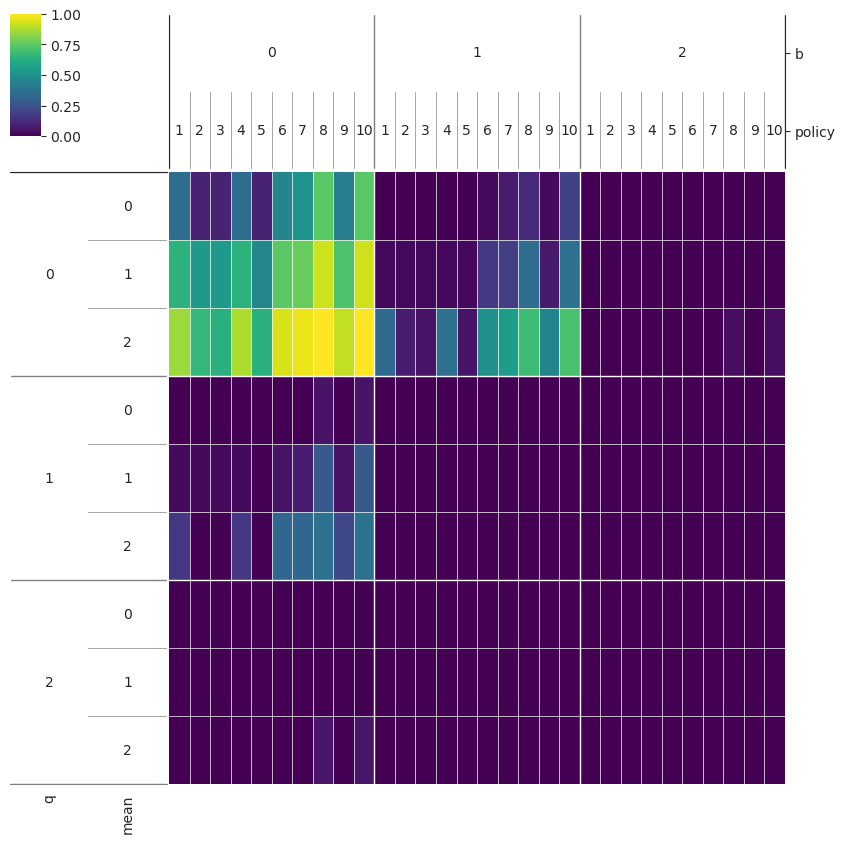

In [123]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['reliability'] < threshold

dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


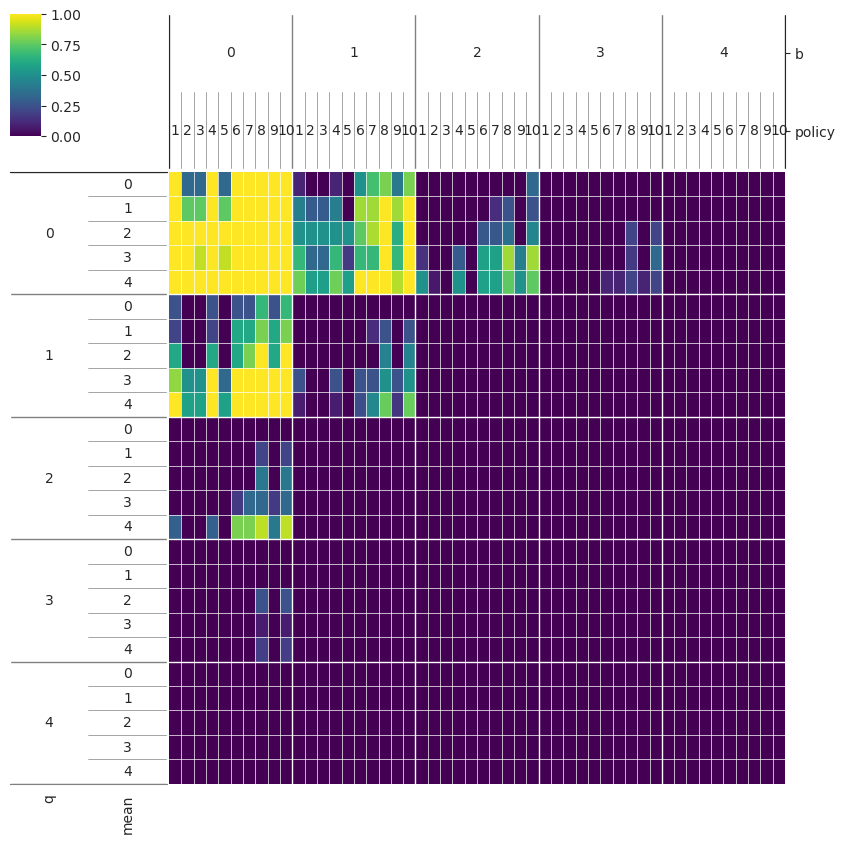

In [124]:
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=5)
plt.show()

We can see from this visual that if q is low, while b is low, we have a high concentration of cases where reliability < 10%. The mean and policy have some limited additional influence.